In [65]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
data_complete = pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [66]:
data_complete.shape

(1906, 5)

## Tumor Response to Treatment

In [73]:
# Create a group based on the values in the Drug and Timepoint columns and 
#Calculate the mean for each Tumor Volume Data in our group
volume_tumor = data_complete.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'].reset_index()

# Convert to DataFrame
vtumor_df = pd.DataFrame(volume_tumor)

# Preview DataFrame
vtumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [71]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_tumor = data_complete.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'].reset_index()
# Convert to DataFrame
SEM_tumor_df = pd.DataFrame(SEM_tumor)
# Preview DataFrame
SEM_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [94]:
# Minor Data Munging to Re-Format the Data Frames
Drug_Time = vtumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
SEM_tum = SEM_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
Drug_Time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


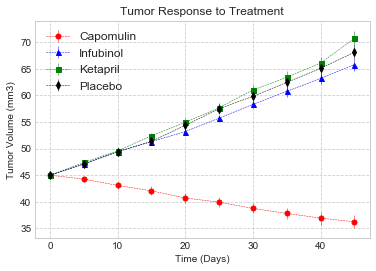

In [115]:

# Generate the Plot (with Error Bars)
plt.errorbar(Drug_Time.index, Drug_Time["Capomulin"], yerr=SEM_tum["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Drug_Time.index, Drug_Time["Infubinol"], yerr=SEM_tum["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Drug_Time.index, Drug_Time["Ketapril"],yerr=SEM_tum["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(Drug_Time.index, Drug_Time["Placebo"],yerr=SEM_tum["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# Set x and y axis labels including the title of the chart

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)') 

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig('Tumor-TreatmentResponse.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [81]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Msites_mean = data_complete.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'].reset_index()

# Convert to DataFrame
Msites_df = pd.DataFrame(Msites_mean)

# Preview DataFrame
Msites_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [98]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SEM_msites = data_complete.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'].reset_index()

# Convert to DataFrame
SEM_msites_df = pd.DataFrame(SEM_msites)

# Preview DataFrame
SEM_msites_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [101]:
# Minor Data Munging to Re-Format the Data Frames
Msites_time = Msites_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
SEM_sites = SEM_msites_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
Msites_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


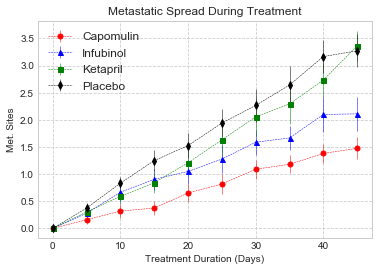

In [102]:
# Generate the Plot (with Error Bars)
plt.errorbar(Msites_time.index, Msites_time['Capomulin'], yerr=SEM_sites['Capomulin'],\
             color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(Msites_time.index, Msites_time['Infubinol'], yerr=SEM_sites['Infubinol'],\
             color='b', marker='^', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(Msites_time.index, Msites_time['Ketapril'],yerr=SEM_sites['Ketapril'],\
             color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(Msites_time.index, Msites_time['Placebo'],yerr=SEM_sites['Placebo'],\
             color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Metastatic Spread During Treatment') 
plt.xlabel('Treatment Duration (Days)') 
plt.ylabel('Met. Sites') 

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig('MetastaticSpreadinTreatment.png')

# Show the Figure
plt.show()


## Survival Rates

In [105]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Num_mice = data_complete.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
Num_mice_df = pd.DataFrame({'Mouse Count': Num_mice}).reset_index()

# Preview DataFrame
Num_mice_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [106]:
# Minor Data Munging to Re-Format the Data Frames
Sur_mice = Num_mice_df.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
Sur_mice.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


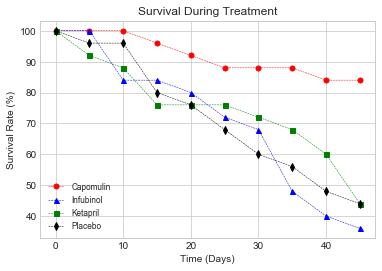

In [114]:
# Generate the Plot (Accounting for percentages)
plt.plot((100/25) * Sur_mice['Capomulin'], 'ro', linestyle='dashed', markersize=5, linewidth=0.50)
plt.plot((100/25) * Sur_mice['Infubinol'], 'b^', linestyle='dashed', markersize=5, linewidth=0.50)
plt.plot((100/25) * Sur_mice['Ketapril'], 'gs', linestyle='dashed', markersize=5, linewidth=0.50)
plt.plot((100/25) * Sur_mice['Placebo'], 'kd', linestyle='dashed', markersize=5, linewidth=0.50)

plt.title('Survival During Treatment') 
plt.ylabel('Survival Rate (%)') 
plt.xlabel('Time (Days)') 
plt.grid(True)
plt.legend(loc='best', fontsize='small')

# Save the Figure
plt.savefig('SurvivalDuringTreatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [121]:
# Calculate the percent changes for each drug
percent_change = (100 / Drug_Time.iloc[0]) * (Drug_Time.iloc[-1] - Drug_Time.iloc[0])
SEM_percent_change = (100/ SEM_tum.iloc[0])* (SEM_tum.iloc[-1] - SEM_tum.iloc[0]) 
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

NameError: name 'pct_changes' is not defined

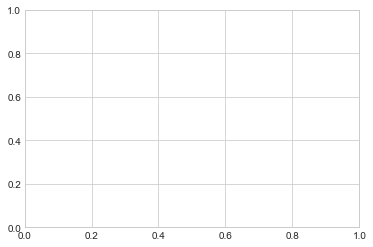

In [122]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

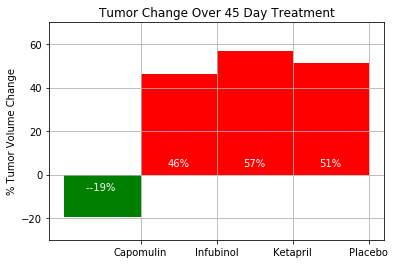